In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Экспоненциальное распределение

Экспоненциальное распределение описывает интервалы времени между независимыми событиями, происходящими со средней интенсивностью $\lambda$. Количество наступлений такого события за некоторый отрезок времени описывается дискретным распределением Пуассона. Экспоненциальное распределение вместе с распределением Пуассона составляют математическую основу теории надёжности.

Кроме теории надёжности, экспоненциальное распределение применяется в описании социальных явлений, в экономике, в теории массового обслуживания, в транспортной логистике — везде, где необходимо моделировать поток событий.

Экспоненциальное распределение является частным случаем распределения хи-квадрат (для n=2). Так как экспоненциально распределённая величина является величиной хи-квадрат с 2-мя степенями свободы, то она может быть интерпретирована как сумма квадратов двух независимых нормально распределенных величин.

https://habr.com/ru/post/311092/#exp

Плотность вероятности экспоненциально распределения:

$f_\lambda(x)=\lambda e^{-\lambda x}\ \ \$

определена для неотрицательных действительных значений $x$.

Матожидание и дисперсия экспоненциального распределения:

$EX={1 \over \lambda} \ \ \$

$DX={1 \over \lambda^2} \ \ \$

Сгенерируем выборку объёма 1000 из экспоненциального распределения с $\lambda=0.2$:

In [99]:
exp_rv = sts.expon(scale=5) # scale = 1 / lambda
sample = exp_rv.rvs(1000)

Гистограмма выборки и теоретическая плотность распределения случайной величины:

Text(0.5, 0, '$x$')

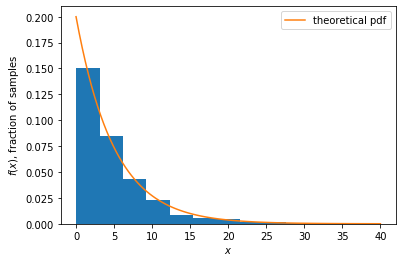

In [100]:
plt.hist(sample, density=True)
x = np.linspace(0,40,100)
pdf = exp_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=2)
plt.legend()
plt.ylabel('$f(x)$, fraction of samples')
plt.xlabel('$x$')

In [126]:
# Сгенерируем 1000 выборок объёма 5, 10, 30, 40, 100:
df = pd.DataFrame(sample, columns=['KDE'])
array1 = []
array2 = []
array3 = []
array4 = []
array5 = []
n = 1000
for i in range(1,n):
    array1.append(df['KDE'].sample(n=5, replace= True).mean())
    array2.append(df['KDE'].sample(n=10, replace=True).mean())
    array3.append(df['KDE'].sample(n=30, replace=True).mean())
    array4.append(df['KDE'].sample(n=40, replace=True).mean())

Математическое ожидание и дисперсия экспоненциального распределения с $\lambda=0.2$:

In [109]:
EX = 5
DX = 25

Значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних:

In [127]:
# Матожидание одинаково для всех распределений и равно:
mu = 5
# Дисперсии и стандартные отклонения при n = 5, 10, 30, 40:
DX_5 = 25/5
sigma_5 = DX_5**0.5

DX_10 = 25/10
sigma_10 = DX_10**0.5

DX_30 = 25/30
sigma_30 = DX_30**0.5

DX_40 = 25/40
sigma_40 = DX_40**0.5

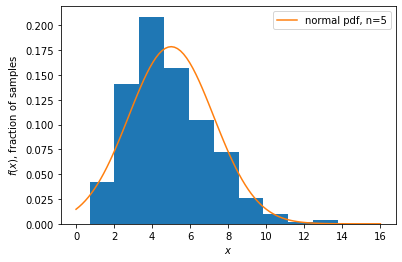

In [121]:
# Гистограмма распределения ыборочных средних при n=5:
plt.hist(array1, density=True)
plt.ylabel('$f(x)$, fraction of samples')
plt.xlabel('$x$')
# Плотность соответствующего нормального распределения:
norm_rv = sts.norm(loc=mu, scale=sigma_5)
x = np.linspace(0,16,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='normal pdf, n=5', alpha=2)
plt.legend()

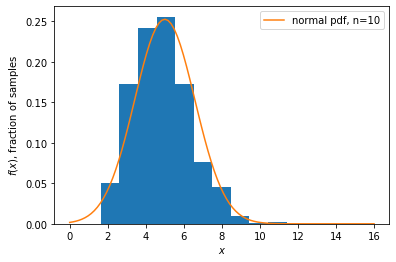

In [122]:
# Гистограмма распределения ыборочных средних при n=10:
plt.hist(array2, density=True)
plt.ylabel('$f(x)$, fraction of samples')
plt.xlabel('$x$')
# Плотность соответствующего нормального распределения:
norm_rv = sts.norm(loc=mu, scale=sigma_10)
x = np.linspace(0,16,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='normal pdf, n=10', alpha=2)
plt.legend()

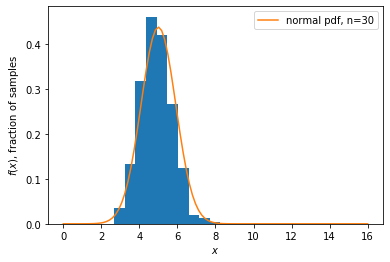

In [123]:
# Гистограмма распределения ыборочных средних при n=30:
plt.hist(array3, density=True)
plt.ylabel('$f(x)$, fraction of samples')
plt.xlabel('$x$')
# Плотность соответствующего нормального распределения:
norm_rv = sts.norm(loc=mu, scale=sigma_30)
x = np.linspace(0,16,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='normal pdf, n=30', alpha=2)
plt.legend()

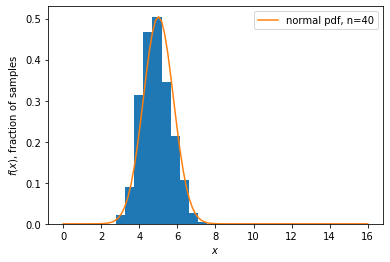

In [124]:
# Гистограмма распределения ыборочных средних при n=40:
plt.hist(array4, density=True)
plt.ylabel('$f(x)$, fraction of samples')
plt.xlabel('$x$')
# Плотность соответствующего нормального распределения:
norm_rv = sts.norm(loc=mu, scale=sigma_40)
x = np.linspace(0,16,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='normal pdf, n=40', alpha=2)
plt.legend()

# Выводы:

Точность аппроксимации распределения выборочных средних нормальным распределением с ростом n увеличивается. Можно заметить, что при размере выборки, стремящемся к бесконечности, стандартное отклонение от среднего значения стремится к нулю. Это означает, что чем больше размер нашего набора данных, тем меньше стандартная ошибка.